In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy import ndarray
import seaborn as sns 
import scipy.integrate as integrate
%matplotlib inline

Пусть $\xi = (\xi_1,\xi_2) \sim N(a, \sum)$, где $a = \binom{1}{4}, \sum = \binom{10 ~~ 8}{8 ~~ 10}$.

Постоить график плотности этого вектора. Для $y \in \{ -3,0,1,5 \}$ построить графики $f_{\xi_1 | \xi_2} (x|y)$.

Построить график $E(\xi_1 | \xi_2 = y)$ в зависимости от $y$ и построить на нем прямую $x = E\xi_1$

In [2]:
distribution = stats.multivariate_normal([1, 4], [[10, 8], [8, 10]])

In [7]:
# Функция, строящая график плотности.
def build_density():
    # Строим 3D график плотности.
    X = Y = np.arange(-15, 15, 0.1)
    X, Y = np.meshgrid(X, Y)
    fig = pylab.figure(figsize=(13, 6))
    ax = fig.gca(projection='3d')
    density = np.array([distribution.pdf([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = density.reshape(X.shape)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    plt.title("3D график плотности")
    plt.xlabel(r"X")
    plt.ylabel(r"Y")
    ax.set_zlabel(r'density')
    plt.show()
    
    # Плотность на плоскости
    d = distribution.rvs(500)
    x_ = d[:, 0]
    y_ = d[:, 1]
    sns.jointplot(x=x_, y=y_, kind="kde")
    plt.title("График плотности построенный по выборке размера 500.")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    # Теперь построим плотность по сетке.
    plt.figure(figsize=(8,8))
    plt.title("График плотности построенный по сетке.")
    C = plt.contour(X, Y, Z, cmap=cm.coolwarm)
    plt.clabel(C, inline=1, fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

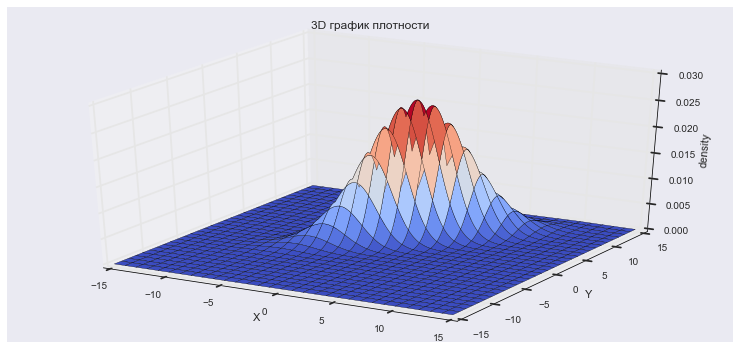

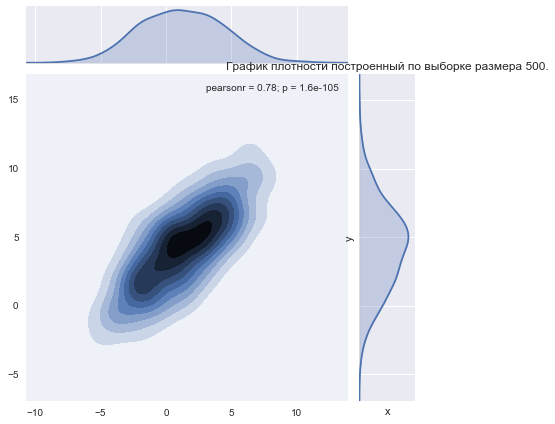

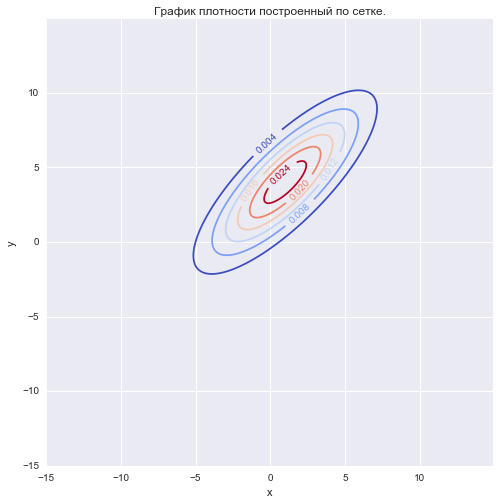

In [8]:
build_density()

Видно, что максимум плотности находится в районе точки $(1,4)$, как и ожидалось.

Теперь для $y \in \{ -3,0,1,5 \}$ построим графики $f_{\xi_1 | \xi_2} (x|y)$.

In [11]:
def get_conditional_density(y):
    # Плотность условия.
    density_co = integrate.quad(lambda x: distribution.pdf([x, y]), -np.inf, +np.inf)[0]
    # Условная плотность.
    condition_density = lambda x: float(distribution.pdf([x, y])) / density_co
    # Строим график.
    plt.figure(figsize=(10, 6))
    grid = np.linspace(-15, 15, 200)
    plt.plot(grid, np.vectorize(condition_density)(grid), label=r'$f_{\xi_1 | \xi_2} (x|y = $' + str(y) + ')')
    # Cтроим графики
    plt.xlabel(r"x")
    plt.ylabel(r"density")
    plt.legend()
    plt.show()

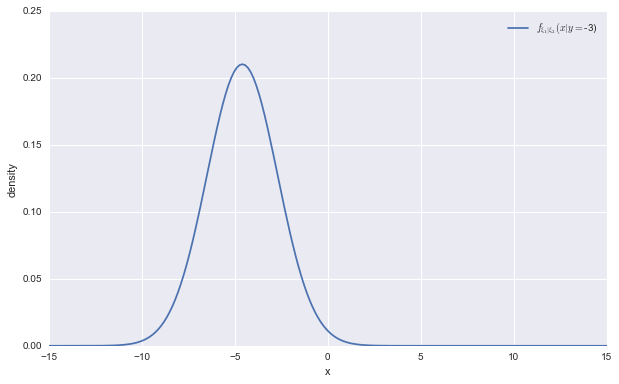

In [12]:
get_conditional_density(-3)

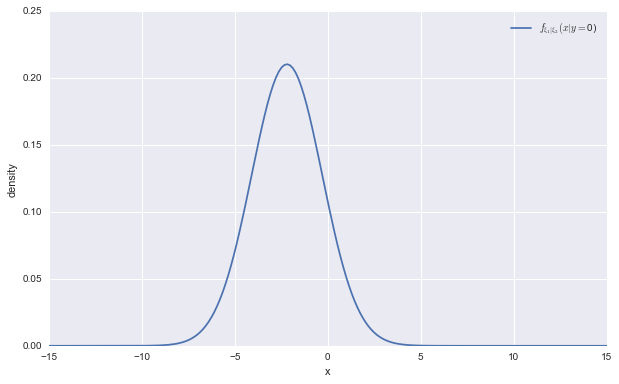

In [13]:
get_conditional_density(0)

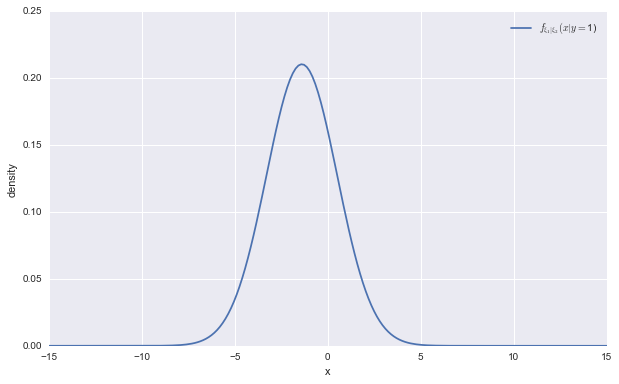

In [14]:
get_conditional_density(1)

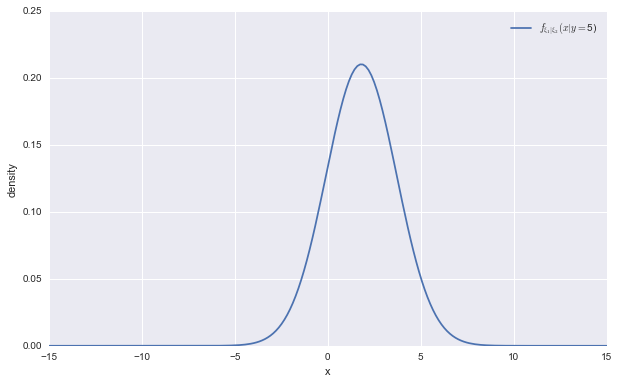

In [15]:
get_conditional_density(5)

Видим, что плотность смещается вправо, при увеличении $y$. Что ожидаемо, так как мы учитываем с большими весами то, что находится правее(ближе к y).

Построим график $E(\xi_1 | \xi_2 = y)$ в зависимости от $y$ и построим на нем прямую $x = E\xi_1$

In [22]:
# Функция, считающая условное матожидание в зависимости от y.
def conditional_mean(y):
    density_co = integrate.quad(lambda x: distribution.pdf([x, y]), -np.inf, +np.inf)[0]
    cond_dens = lambda x: float(distribution.pdf([x, y])) / density_co
    # Считаем условное матожидание.
    result = integrate.quad(lambda x: x * cond_dens(x), -np.inf, +np.inf)[0]
    return result
    
def get_conditional_mean():
    # Считаем E\xi_1.
    Xi_1_mean = integrate.dblquad(lambda x, y: x * distribution.pdf([x, y]), -np.inf, np.inf, 
                                  lambda x: -np.inf, lambda x: np.inf)[0] 
    # Настраиваем график
    plt.figure(figsize=(7, 7))
    grid = np.linspace(-14, 14, 200)
    plt.axvline(x = Xi_1_mean)
    plt.plot(grid, np.vectorize(conditional_mean)(grid), label=r'$E(\xi_1 | \xi_2 = y)$')
    plt.xlabel(r"y")
    plt.ylabel(r"mean")
    # Cтроим графики
    plt.title(r"График зависимости условного матожидания $E(\xi_1|\xi_2=y)$, вертикальная линия $E(\xi_1)$")
    plt.legend()
    plt.show()

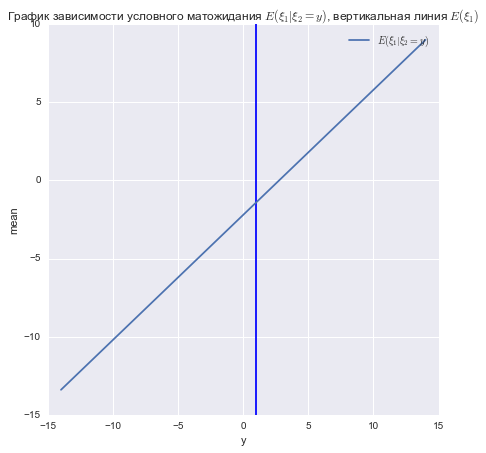

In [23]:
get_conditional_mean()

### Вывод. Видно, что $E(\xi_1 | \xi_2 = y)$ линейно зависит от $y$.
Действительно из $cov(-\alpha\xi_2 + \xi_1, \xi_2) = 0$ имеем $\alpha = \frac{cov(\xi_1,\xi_2)}{cov(\xi_2,\xi_2)} = \frac{4}{5}$, тогда $E(\xi_1 | \xi_2 = y) = \frac{4}{5}\xi_2 + E(\xi_1 - \frac{4}{5}\xi_2) = \frac{4}{5}\xi_2 - \frac{11}{5}$, 'это действительно линейная зависимость, найденная нами.